In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [67]:
sales = pd.read_excel('/content/RelatorioVendasTotais.xls')

In [81]:
# Vai existir alguns dados que parecerão "Desvio Padrão", mas só são dados que foram mau registrados.

sales.head(50)

,Categoria,Produto,Qtd.Vendida,Valor Médio,Valor de Vendas,Custo Médio,Custo Direto,Lucratividade,Margem de Lucro
0,Encomenda,Encomenda,1,60,60,10,10.00,50.00,83.33
1,Combo,Kit Xonadinho,5,50.6,253,60,300.00,0.00,0.00
2,Combo,Combo milkshake,1,35,35,35,35.00,0.00,0.00
3,Combo,Combo coca,4,27,108,27,108.00,0.00,0.00
4,Combo,Combo mix,6,26,156,26,156.00,0.00,0.00
5,sanduíches,Borogodó,68,20.3,1382.28,14.63,991.42,390.86,27.86
6,sanduíches,Muvuca,13,20,259.96,10.57,137.41,122.55,47.31
7,ROSCAS,Gaiato,11,9.94,109.32,5.16,56.76,52.56,47.45
8,ROSCAS,Nevou,2,9.5,19,3.02,6.04,12.96,68.21
9,recheados,Palozo recheado,7,8.58,60.08,3.39,23.73,36.35,60.38


In [69]:
# Esse bloco de código só foi usado para arrumar as categorias, muitos vieram sem uma nomeação adequada.

mini = [30, 31, 32, 35, 36, 41, 44]
sales.loc[mini, 'Categoria'] = 'Mini'

roscas = [8, 13, 16, 17]
sales.loc[roscas, 'Categoria'] = 'ROSCAS'

sales.loc[1, 'Categoria'] = 'Combo'
sales.loc[0, 'Categoria'] = 'Encomenda'


In [70]:
passado = sales.loc[75]

In [71]:
sales = sales.drop([77, 75,76, 81, 78, 79, 80, 82, 83, 66, 55])
sales = sales.drop('Sub-Categoria', axis=1)
sales = sales.drop('Vendedor', axis=1)
sales = sales.drop('Subtotal', axis=1)

In [72]:
def categorize(row):
    if 'Combo' in row['Produto']:
        return 'Combo'
    else:
        return row['Categoria']

sales['Categoria'] = sales.apply(categorize, axis=1)


def change(row):
  if 'recheado' in row['Produto']:
    return 'recheados'
  else:
      return row['Categoria']

sales['Categoria'] = sales.apply(change, axis=1)


def change(row):
  if 'Sem categoria' in row['Categoria']:
    return 'Encomenda'
  else:
      return row['Categoria']

sales['Categoria'] = sales.apply(change, axis=1)

In [73]:
sales.isna().sum()

Categoria          0
Produto            0
Qtd.Vendida        0
Valor Médio        0
Valor de Vendas    0
Custo Médio        0
Custo Direto       0
Lucratividade      0
Margem de Lucro    0
dtype: int64

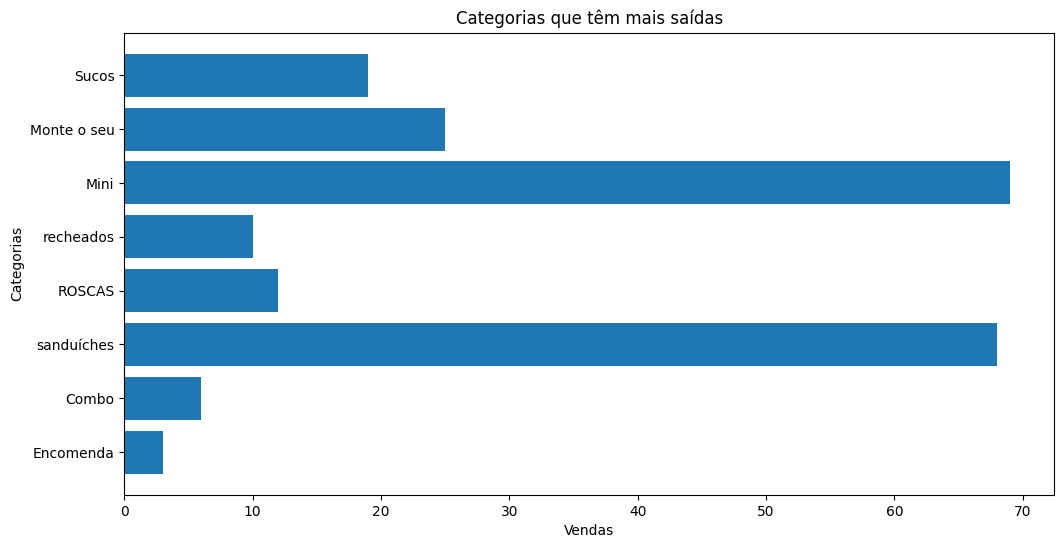

In [74]:
plt.figure(figsize=(12, 6))
plt.barh(sales['Categoria'], sales['Qtd.Vendida'])


plt.xlabel('Vendas')
plt.ylabel('Categorias')
plt.title("Categorias que têm mais saídas")

plt.show()

In [75]:
vendas_categorias = sales.groupby('Categoria')['Qtd.Vendida'].count()
vendas_categorias

Categoria
Combo           4
Encomenda       2
Mini           19
Monte o seu    21
ROSCAS         15
Sucos           1
recheados       8
sanduíches      3
Name: Qtd.Vendida, dtype: int64

In [76]:
total_vendas = sales['Qtd.Vendida'].sum()
category_sale = sales.groupby('Categoria')['Qtd.Vendida'].sum()

porcentagem_uni = (category_sale / total_vendas) * 100

porcentagem_uni

Categoria
Combo           2.244039
Encomenda        0.56101
Mini           53.856942
Monte o seu    11.781206
ROSCAS         12.061711
Sucos           2.664797
recheados       5.189341
sanduíches     11.640954
Name: Qtd.Vendida, dtype: object

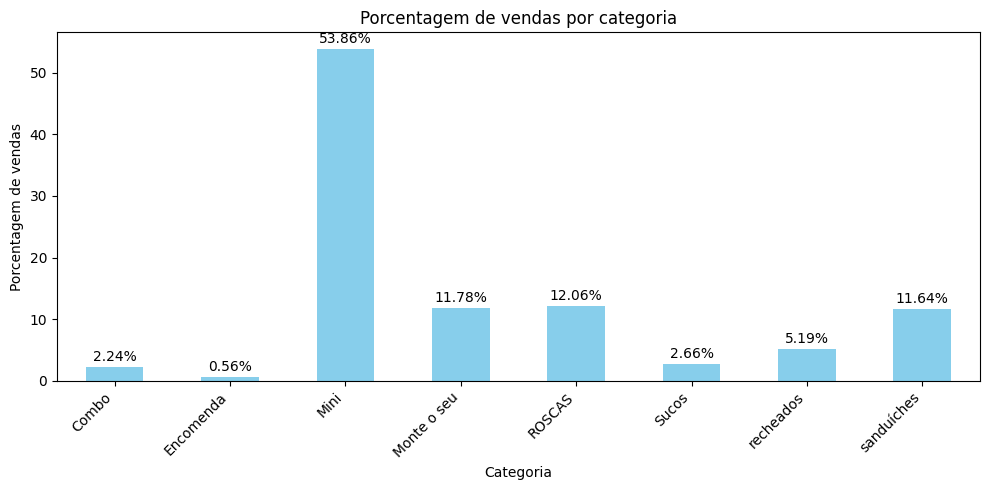

In [77]:
plt.figure(figsize=(10, 5))
porcentagem_uni.plot(kind='bar', color='skyblue')
plt.title('Porcentagem de vendas por categoria')
plt.xlabel('Categoria')
plt.ylabel('Porcentagem de vendas')
plt.xticks(rotation=45, ha='right')
for i, percentage in enumerate(porcentagem_uni):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [78]:
valores = sales['Margem de Lucro']
categorias = sales['Categoria']


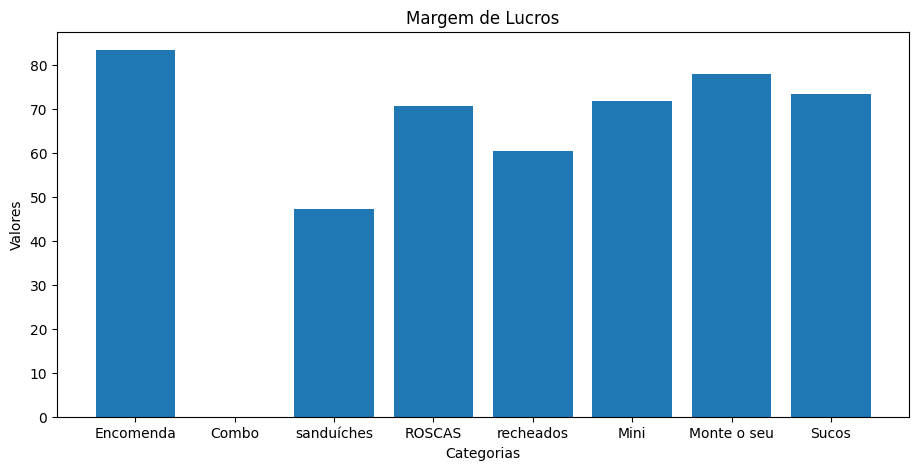

In [79]:
plt.figure(figsize=(11,5))
plt.bar(categorias, valores)
plt.title('Margem de Lucros')
plt.xlabel('Categorias')
plt.ylabel('Valores')

plt.show()